### Second Notebook : Keras Embedding + BiLSTM Model 

In [10]:
#Importing Libraries
import re
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import keras
from keras.models import load_model
from keras.layers import *
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras import layers

##### Utility Function for data processing 

In [2]:
def processing(data):
    data['Utterances'] = data['Utterances'].apply(lambda x: x.lower())
    data['Utterances'] = data['Utterances'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

    y = pd.get_dummies(data['Basic']).values

    return data,y

In [4]:
data=pd.read_csv('../Datasets/MRDA/mrda_data/full_set.txt', sep='|')
data.columns=['Speaker','Utterances','Basic','General','Full']
MAX_PADDING = 100

def get_x_val(data):  # utility function: tockenize and get X
    tokenizer = Tokenizer(num_words = 5000, split=" ")
    tokenizer.fit_on_texts(data['Utterances'].values)
    x = tokenizer.texts_to_sequences(data['Utterances'].values)
    x = pad_sequences(x, padding='post', maxlen=MAX_PADDING)
    
    return x

In [5]:
train_data = pd.read_csv('../Datasets/MRDA/mrda_data/full_set.txt', sep='|')
train_data.columns=['Speaker','Utterances','Basic','General','Full']
train_data,y_train = processing(train_data)
x_train = get_x_val(train_data)

val_data = pd.read_csv('../Datasets/MRDA/mrda_data/train_set.txt', sep='|')
val_data.columns=['Speaker','Utterances','Basic','General','Full']
val_data,y_val = processing(val_data)
x_val = get_x_val(val_data)

test_data = pd.read_csv('../Datasets/MRDA/mrda_data/test_set.txt', sep='|')
test_data.columns=['Speaker','Utterances','Basic','General','Full']
test_data,y_test = processing(test_data)
x_test = get_x_val(test_data)

### Modeling

In [6]:
inputs1=Input(shape=(100,))

x1=Embedding(input_dim=5000,
             output_dim=300,
             input_length=100,
             embeddings_regularizer=keras.regularizers.l2(.001))(inputs1)

x1=Bidirectional(LSTM(units=20,
                      dropout=0.3,
                      recurrent_dropout=0.2,
                      return_sequences = False))(x1)

output=Dense(5,activation='softmax')(x1) 
model=keras.Model(inputs1,output)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          1500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                51360     
_________________________________________________________________
dense (Dense)                (None, 5)                 205       
Total params: 1,551,565
Trainable params: 1,551,565
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', 
                                               mode='auto', 
                                               patience=1, 
                                               verbose=1)

hist = model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=32, 
          verbose=1,
          callbacks=[early_stopping],
          validation_data=(x_val, y_val))

Epoch 1/100
2346/2346 [==============================] - 317s 134ms/step - loss: 0.7418 - accuracy: 0.7515 - val_loss: 0.7313 - val_accuracy: 0.7527
Epoch 2/100
2346/2346 [==============================] - 346s 147ms/step - loss: 0.6617 - accuracy: 0.7780 - val_loss: 0.7164 - val_accuracy: 0.7584
Epoch 3/100
2346/2346 [==============================] - 349s 149ms/step - loss: 0.6494 - accuracy: 0.7830 - val_loss: 0.7058 - val_accuracy: 0.7637
Epoch 4/100
2346/2346 [==============================] - 333s 142ms/step - loss: 0.6421 - accuracy: 0.7865 - val_loss: 0.7076 - val_accuracy: 0.7652
Epoch 5/100
2346/2346 [==============================] - 336s 143ms/step - loss: 0.6377 - accuracy: 0.7892 - val_loss: 0.7147 - val_accuracy: 0.7658
Epoch 6/100
2346/2346 [==============================] - 334s 142ms/step - loss: 0.6369 - accuracy: 0.7883 - val_loss: 0.7008 - val_accuracy: 0.7712
Epoch 00006: early stopping


In [9]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['figure.dpi'] = 100


def plot(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0,1)
    plt.show()

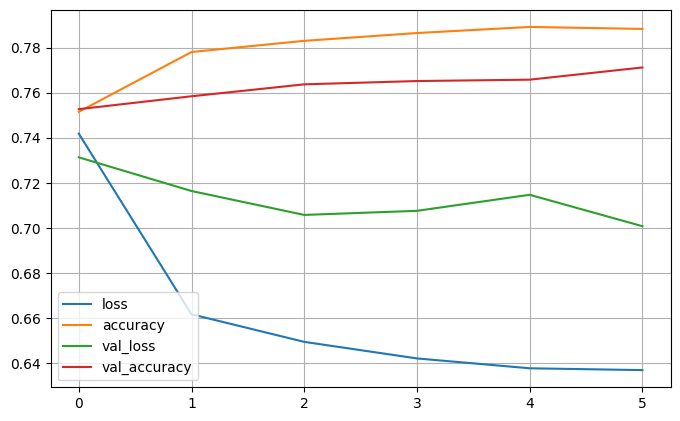

In [10]:
plot(hist)

In [11]:
model.evaluate(x_test, y_test)

522/522 [==============================] - 9s 18ms/step - loss: 0.6628 - accuracy: 0.7756


[0.6627858281135559, 0.7755823135375977]

In [9]:
print('The model accuracy is : 0.77')

The model accuracy is : 0.77
